# Dimensionality reduction and PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Global variables
random_seed = 585

In [3]:
# Data loading
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

header = ['Cultivar','Alcohol','Malic','Ash','Alcalinity',
          'Magnesium','Phenols','Flavanoids','Nonflavanoid',
          'Proanthocyanins','Color','Hue','Dilution','Proline']

wine = pd.read_csv(url, names = header)
wine.head()

,Cultivar,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Dimensions of the wine table
wine.shape

(178, 14)

## Just Naive Bayes

In [5]:
# Splitting onto target and features
X = wine.iloc[ : , 1:len(header) ]
y = wine.iloc[ : , 0 ]

In [6]:
# Make a train/test split using 20%
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = random_seed)

In [7]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
# Warning about converting all numeric to float64

/home/ebecerra/anaconda3/envs/duch_01/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ebecerra/anaconda3/envs/duch_01/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [8]:
# Fitting the model
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
# Evaluating the model
predictions = clf.predict(scaler.transform(X_test))
round(metrics.accuracy_score(y_test, predictions) * 100, 2)

/home/ebecerra/anaconda3/envs/duch_01/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


96.3

## Naive Bayes with PCA

In [10]:
# PCA of train data
pca = PCA().fit(X_train)
X_train_projected = pca.transform(X_train)

In [11]:
# Our new projected data
pd.DataFrame(X_train_projected).iloc[0:10,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.474871,-2.366391,0.317904,-0.749630,0.919159,2.387920,1.742217,0.377412,-0.462100,-0.235992,0.348793,0.066415,-0.993999
1,2.664898,-1.127606,-0.611624,-0.958832,1.073345,-1.224865,-0.566870,-0.327503,-0.269766,0.197111,0.064453,-0.073446,-0.142716
2,2.385432,1.761627,-2.181249,-0.740385,1.025976,1.043631,0.662936,-0.056656,-0.814007,0.347937,0.180876,0.068146,0.101911
3,-2.350633,-0.328324,-0.883374,1.449194,-0.273441,0.246145,-0.960465,-0.273805,0.491572,0.219896,0.508916,-0.119717,0.515127
4,-3.524011,-0.850755,-1.478440,-0.135407,-0.391657,1.448660,0.307552,0.855672,-0.203450,-0.009185,-0.278906,0.567265,-0.010158
5,-0.494995,2.325428,-0.658295,-0.214020,1.111955,-1.129280,0.173602,-0.155236,0.580100,-0.444121,-0.282173,0.011135,-0.055041
6,2.537643,0.021561,1.077114,3.402269,0.316765,-1.779125,2.494918,-0.211260,-0.143485,-0.445914,0.210737,-0.548741,0.012885
7,-4.216586,-0.627978,-1.822850,-0.583721,0.472052,-0.801302,-1.132813,-0.885324,-0.009665,-0.176935,0.570486,-0.315236,0.354872
8,-0.724511,2.900838,-4.354408,0.861024,-1.606679,-0.297682,0.015951,0.650164,-0.199353,0.682288,0.019197,-0.867979,-0.366179
9,1.988056,-1.479637,0.385749,0.127849,-1.207879,-0.975085,-1.028339,0.313924,-0.163438,-0.510784,-0.608492,0.161903,-0.093347


In [12]:
# Printing the PCs
df_components = pd.DataFrame(pca.components_)
df_components.index = header[1:]
df_components

,0,1,2,3,4,5,6,7,8,9,10,11,12
Alcohol,0.141146,-0.281881,-0.043255,-0.246330,0.135777,0.391388,0.409767,-0.287539,0.323900,-0.071687,0.299436,0.365805,0.286947
Malic,-0.497627,-0.197943,-0.300288,0.046258,-0.283796,-0.050379,-0.005782,-0.018574,-0.041986,-0.540958,0.263178,0.192143,-0.369914
Ash,-0.180967,0.015277,0.639457,0.581876,0.228844,0.137085,0.143232,0.231092,0.110204,-0.137253,0.142400,0.141581,-0.056080
Alcalinity,-0.251164,-0.185468,-0.086665,0.052662,0.728908,-0.188024,-0.152012,-0.493309,0.049440,-0.018759,-0.098957,-0.171909,-0.130277
Magnesium,-0.101919,0.465730,-0.190434,0.168941,-0.111604,0.221738,0.185358,-0.199754,0.496982,0.067757,-0.465723,0.118199,-0.299279
Phenols,-0.102483,-0.628393,0.105950,0.254740,-0.401961,0.033995,0.119143,-0.241696,0.012166,0.463833,-0.161778,-0.149917,-0.138657
Flavanoids,-0.236132,-0.180124,-0.260646,-0.058396,0.141132,-0.034031,-0.099880,0.563472,0.585586,0.224548,0.167088,-0.253342,0.080395
Nonflavanoid,-0.366229,-0.145442,0.085506,-0.402558,0.214493,0.326088,0.203807,0.341440,-0.341547,0.079346,-0.456683,0.151632,-0.101971
Proanthocyanins,-0.535785,0.174555,0.293968,-0.194313,-0.256542,-0.122889,0.021726,-0.233593,0.126819,-0.127678,-0.096471,-0.240214,0.568281
Color,-0.200267,0.312185,-0.120155,0.044483,0.028269,0.491720,0.132510,-0.122755,-0.276884,0.264296,0.468201,-0.434714,-0.126875


In [13]:
# Explained Variance per component
np.round(pca.explained_variance_ratio_ * 100, 2)

array([37.7 , 18.67, 11.52,  6.98,  6.44,  4.65,  3.98,  2.6 ,  2.1 ,
        1.84,  1.6 ,  1.2 ,  0.73])

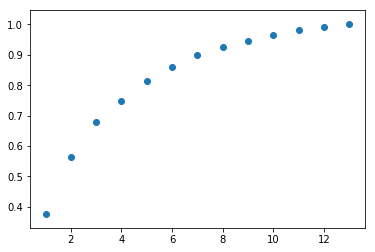

In [14]:
plt.scatter(x = range(1,14), y = np.cumsum(pca.explained_variance_ratio_))

In [15]:
# Cumulative Variance
np.cumsum(pca.explained_variance_ratio_)

array([0.37695942, 0.56366569, 0.67888977, 0.74868462, 0.81303694,
       0.85955858, 0.89936325, 0.92533331, 0.9463765 , 0.96474922,
       0.98072254, 0.99273064, 1.        ])

In [16]:
X_train_reduced = X_train_projected[:,0:5]

In [17]:
# Fitting the model
clf2 = GaussianNB()
clf2.fit(X_train_reduced, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
# Evaluating the model
X_test_reduced = pca.transform(scaler.transform(X_test))[:,0:5]
predictions = clf2.predict(X_test_reduced)
round(metrics.accuracy_score(y_test, predictions) * 100, 2)

/home/ebecerra/anaconda3/envs/duch_01/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


98.15

## PCA for Visualization

In [19]:
df = pd.DataFrame(X_train_projected)
df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
             'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
             'PC11', 'PC12','PC13']
df['Cultivar'] = np.array(y_train)

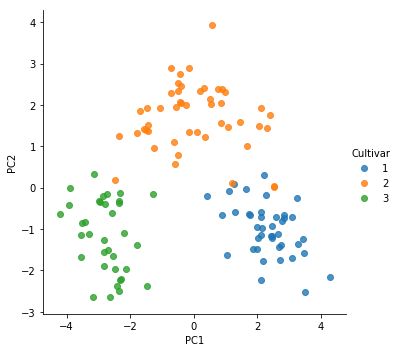

In [20]:
# PC1 vs PC2
sns.lmplot(data = df,
           x = 'PC1', y = 'PC2', hue = 'Cultivar', fit_reg = False)


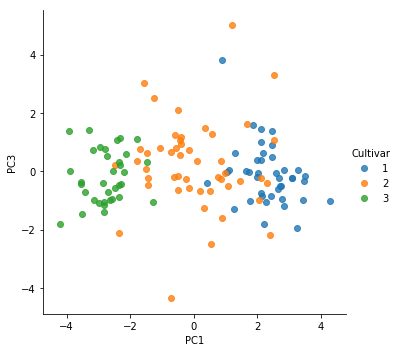

In [21]:
# PC1 vs PC3
sns.lmplot(data = df,
           x = 'PC1', y = 'PC3', hue = 'Cultivar', fit_reg = False)

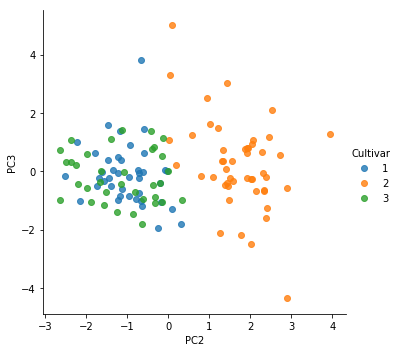

In [22]:
# PC2 vs PC3
sns.lmplot(data = df,
           x = 'PC2', y = 'PC3', hue = 'Cultivar', fit_reg = False)